In [1]:
%%javascript
// to avoid scroll in windows
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt #used to avoid a warning message

In [3]:
import pandas as pd
import numpy as np
import csv
import os
#from repast4py import parameters
#params = parameters.init_params("model1.yaml", "")

folder=input("Which is your input folder? ")
os.chdir("./"+folder)


with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0]
        rankNum=int(row[1])
        ag0num=int(row[2])

Which is your input folder? prova3ranks


In [4]:
colNames=["dimensional class", "initial inventories","total costs", "final inventories","profits", "added value",\
          "total production", "cost of production", "cost of unused factors",\
          "total lost production", "total cost of lost production", "cost of labor", "cost of capital"]
fileNameArray=np.chararray((ag0num, rankNum), itemsize=len(fileNameRoot)+30, unicode=True)

In [5]:
for k in range(rankNum):
    with open(fileNameRoot+"_balancesheetList_"+str(k)+".csv","r") as fileList:
        reader = csv.reader(fileList, delimiter = ',')
  
        for row in reader:
            for i in range(len(row)):
                fileNameArray[i,k]=row[i]

In [6]:
# database
data={}
for k in range(rankNum):
    for i in range(ag0num):
        p1=fileNameArray[i,k].find('(')
        p2=fileNameArray[i,k].find(')')+1
        data[fileNameArray[i,k][p1:p2]]=pd.read_csv(fileNameArray[i,k], header=None)

for aFirm in data.keys():
    data[aFirm].columns=colNames

In [7]:
# output by ranks
with plt.rc_context(rc={'figure.max_open_warning': 0}): #to avoid a worning about open plots
    
    data['allFirms']=data[list(data.keys())[0]].copy() # copy of first firm
    for aFirmUid in list(data.keys())[1:-1]:
        #if data[aFirmUid]['dimensional class'].loc[0] == 1.0: #to filter firms according to dim class
        data['allFirms']=data['allFirms'].add(data[aFirmUid])


In [8]:
data['allFirms'].drop(['dimensional class'], axis=1)

,initial inventories,total costs,final inventories,profits,added value,total production,cost of production,cost of unused factors,total lost production,total cost of lost production,cost of labor,cost of capital
0,0.000,3771.811456,1022.670,-2749.141456,1022.670,517.806825,869.55,2902.261456,3.304338,5.25,2336.0,1435.811456
1,1022.670,3771.811456,2327.040,-2467.441456,1304.370,681.176694,1191.45,2580.361456,58.093026,98.55,2336.0,1425.840543
2,2327.040,3771.811456,3704.580,-2394.271456,1377.540,757.045388,1332.30,2439.511456,107.117746,180.30,2336.0,1415.938873
3,3704.580,3771.811456,5281.425,-2194.966456,1576.845,851.057540,1485.45,2286.361456,104.117435,174.90,2336.0,1406.105964
4,5281.425,3771.811456,6989.880,-2063.356456,1708.455,963.188873,1742.55,2029.261456,182.944853,315.90,2336.0,1396.341339
...,...,...,...,...,...,...,...,...,...,...,...,...
95,177500.805,3771.811456,179577.615,-1695.001456,2076.810,1051.456855,1806.60,1965.211456,71.117911,118.50,7698.0,2614.314052
96,179577.615,3771.811456,181359.255,-1990.171456,1781.640,1014.849858,1876.05,1895.761456,247.792325,424.05,7688.0,2613.083164
97,181359.255,3771.811456,183442.710,-1688.356456,2083.455,1076.091343,1907.55,1864.261456,130.913416,218.70,7713.0,2648.917577
98,183442.710,3771.811456,185566.245,-1648.276456,2123.535,1094.467234,1929.60,1842.211456,122.098118,205.35,7713.0,2630.522316


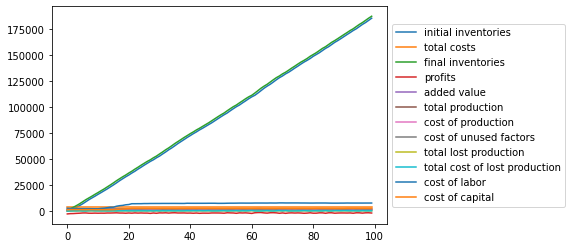

In [9]:
data['allFirms'].drop(['dimensional class'], axis=1).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

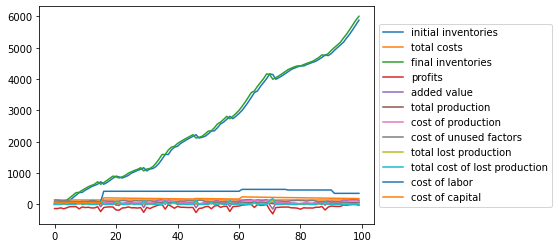

In [10]:
data['(0, 0, 0)'].drop(['dimensional class'], axis=1).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot: >

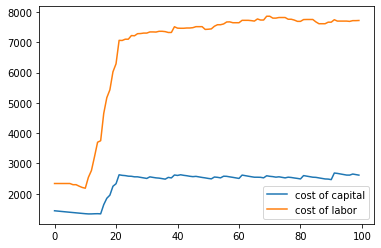

In [11]:
data['allFirms'][[ 'cost of capital','cost of labor']].plot()

<AxesSubplot: >

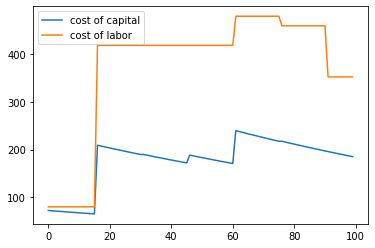

In [12]:
data['(0, 0, 0)'][['cost of capital', 'cost of labor']].plot()

# The National Economic Balance Table

In [13]:
data['allFirms'][['initial inventories', 'added value', 'final inventories']]

,initial inventories,added value,final inventories
0,0.000,1022.670,1022.670
1,1022.670,1304.370,2327.040
2,2327.040,1377.540,3704.580
3,3704.580,1576.845,5281.425
4,5281.425,1708.455,6989.880
...,...,...,...
95,177500.805,2076.810,179577.615
96,179577.615,1781.640,181359.255
97,181359.255,2083.455,183442.710
98,183442.710,2123.535,185566.245
